In [1]:
# import all revelant packages
from headers import *
from twoPoint import *
from twoPointNoise import *

# A collection of figures for the HiZ paper (not logically ordered, not even a bit)

In [2]:
params = {'output': 'mPk','P_k_max_h/Mpc': 40.,'non linear':'halofit', 
          'z_pk': '0.0,10','A_s': 2.10732e-9,'n_s': 0.96824,
          'alpha_s': 0.,'h': 0.6770, 'N_ur': 1.0196,
          'N_ncdm': 2,'m_ncdm': '0.01,0.05','tau_reio': 0.0568,
          'omega_b': 0.02247,'omega_cdm': 0.11923,'Omega_k': 0.}

cosmo = Class()
cosmo.set(params)
cosmo.compute()

In [3]:
exp = experiment(zmin=2., zmax=5., nbins=6, fsky=0.34, sigma_z=0.0, LBG=True)
fishcast = fisherForecast(experiment=exp,cosmo=cosmo,params=params,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='MegaMapper')
print('fishcast done')
#

fishcast done


In [3]:
DESI = experiment(zmin=0.6, zmax=1.7, nbins=3, fsky=0.34, sigma_z=0.0, ELG=True)
desiCast = fisherForecast(experiment=DESI,cosmo=cosmo,params=params,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='DESI')
print('DESI done')
#
Euclid = experiment(zmin=0.7, zmax=2., nbins=5, fsky=0.36, sigma_z=0.0, Euclid=True)
eucCast = fisherForecast(experiment=Euclid,cosmo=cosmo,params=params,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='Euclid')
print('Euclid done')
#
b = interp1d([2,3,4,5],[2.5,4.0,3.5,5.5],kind='linear')
n = interp1d([2,3,4,5],np.array([9.8,1.2,1.0,0.4])*(1e-4),kind='linear')
MegaMapper = experiment(zmin=2., zmax=5., nbins=3, fsky=0.34, sigma_z=0.0, b=b, n=n)
megaCast = fisherForecast(experiment=MegaMapper,cosmo=cosmo,params=params,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='MegaMapper_fiducial')
print('MegaMapper done')
#
PUMA_5_opt = experiment(zmin=2., zmax=6., nbins=8, fsky=0.5, sigma_z=0.0, HI=True, pesimistic=False,Ndetectors=5e3)
puma5optCast = fisherForecast(experiment=PUMA_5_opt,cosmo=cosmo,params=params,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='PUMA')
print('PUMA-5K (optimstic) done')
#
PUMA_5_pess = experiment(zmin=2., zmax=6., nbins=8, fsky=0.5, sigma_z=0.0, HI=True, pesimistic=True,Ndetectors=5e3)
puma5pessCast = fisherForecast(experiment=PUMA_5_pess,cosmo=cosmo,params=params,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='PUMA')
print('PUMA-5K (pessimistic) done')
#
PUMA_32_opt = experiment(zmin=2., zmax=6., nbins=8, fsky=0.5, sigma_z=0.0, HI=True,pesimistic=False,Ndetectors=32e3)
puma32optCast = fisherForecast(experiment=PUMA_32_opt,cosmo=cosmo,params=params,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='PUMA')
print('PUMA-32K (optimstic) done')
#
PUMA_32_pess = experiment(zmin=2., zmax=6., nbins=8, fsky=0.5, sigma_z=0.0, HI=True,pesimistic=True,Ndetectors=32e3)
puma32pessCast = fisherForecast(experiment=PUMA_32_pess,cosmo=cosmo,params=params,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='PUMA')
print('PUMA-32K (pessimistic) done')
#
cv = experiment(zmin=2., zmax=6., nbins=6, fsky=0.34, sigma_z=0.0, LBG=True, custom_n=True, n=10000.)
cv_f = fisherForecast(experiment=cv,cosmo=cosmo,params=params,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=False,name='MegaMapper')
print('cv done')

fishcast done
DESI done
Euclid done
MegaMapper done
PUMA-5K (optimstic) done
PUMA-5K (pessimistic) done
PUMA-32K (optimstic) done
PUMA-32K (pessimistic) done
cv done


## Make the fiducial fisher matrices

In [4]:
# Euclid,DESI,fishcast, MegaMapper and PUMA have OK derivatives.

# before making the fisher matrices, I need to choose my kmax

# Euclid, alpha=0.6. This is consistent with the kmax's here https://arxiv.org/pdf/1606.00180.pdf
# DESI, alpha=0.5. In this they choose 0.1 or 0.2 https://arxiv.org/abs/1308.4164, which is consistent with alpha=0.5. cosmic visions paper chooses 0.2
# MegaMapper, alpha = 0.5. No idea what I should use here. ask simo if he knows
# PUMA, alpha=0.5. cosmic visions uses constant kmax = 0.4.

In [5]:
basis = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                                  'b','b2','bs','alpha0','alpha2','alpha4',\
                                  'N','sn2','m_ncdm','N_ur','alpha_s','Hz',\
                                  'Da','Omega_k'])

In [6]:
F_desi = desiCast.gen_fisher(basis,alpha=0.5)
print('DESI done')
F_euc = eucCast.gen_fisher(basis,alpha=0.6)
print('Euclid done')
F_mega = megaCast.gen_fisher(basis,alpha=0.5)
print('MegaMapper done')
F_puma5opt = puma5optCast.gen_fisher(basis,alpha=0.5)
print('PUMA-5K (optimstic) done')
F_puma5pess = puma5pessCast.gen_fisher(basis,alpha=0.5)
print('PUMA-5K (pessimistic) done')
F_puma32opt = puma32optCast.gen_fisher(basis,alpha=0.5)
print('PUMA-32K (optimstic) done')
F_puma32pess = puma32pessCast.gen_fisher(basis,alpha=0.5)
print('PUMA-32K (pessimistic) done')

DESI done
Euclid done
MegaMapper done
PUMA-5K (optimstic) done
PUMA-5K (pessimistic) done
PUMA-32K (optimstic) done
PUMA-32K (pessimistic) done


In [8]:
np.savetxt('output/DESI/F_desi.txt',F_desi)
np.savetxt('output/Euclid/F_euc.txt',F_euc)
np.savetxt('output/MegaMapper_fiducial/F_mega.txt',F_mega)
np.savetxt('output/PUMA/F_puma5opt.txt',F_puma5opt)
np.savetxt('output/PUMA/F_puma5pess.txt',F_puma5pess)
np.savetxt('output/PUMA/F_puma32opt.txt',F_puma32opt)
np.savetxt('output/PUMA/F_puma32pess.txt',F_puma32pess)

Planck MegaMapper

Planck PUMA-5K

Planck PUMA-32K

Planck DESI

Planck DESI MegaMapper

Planck DESI PUMA-5K

Planck DESI PUMA-32K

"same as above, but replace Planck with Euclid and DESI with SO"

LCDM+as+omega_k

Hz and Da, do for PUMA and MegaMapper with Planck priors


Planck: Omega_cdm, Omega_b, A_s, n_s, h, tau, m_nu, w_0, w_a, Omega_k

SO: hubble, tau, omnuh2, ombh2, omch2, scalar_amp__1___,scalar_spectral_index__1___

S4
Rho_m 0.141745 0.0017 0.03 0.3 0 0 0.00017 \omega_m omega,,m,,
omega_b 0.0223 0.00014 0 0.1 0 0 0.00014 \omega_b omega,,b,,
Theta_s 0.595417 0.00018 0.58843 0.60283 0 0 0.00018 \theta_s theta,,s,,
wa0 -1 0.333333 -2 -0 0 0 0.1 w_0 w''0
wa1 0 0.333333 -3 3 0 0 0.1 w_1 w''1
Omega_k 0 0.002 -0.06 0.06 0 0 0.002 \Omega_k Omega,,k,,
summnu 0.06 0.1 0 3 0 0 0.01 \Sigma m_{\nu} m,,nu,tot,,
Nlnu 3.046 0.3 0 100 0 0 0.3 N_{\nu,{\rm eff}} N,,nu,eff,,
log10amplitude -8.66918 0.01 -8.76918 -8.56918 0 0 0.001 \log_{10}(A) log,,10,,(A)
Enn 0.9667 0.004 0.8 1.1 0 0 0.004 n_s n,,s,,
Alpha 0 0.006 -0.1 0.1 0 0 0.006 \alpha_s alpha,,s,,
Beta_s 0 0.006 -0.1 0.1 0 0 0.006 \beta_s beta,,s,,
ToverS 0 0.05 -0.15 0.15 0 0 0.05 T/S T/S
tau 0.066 0.012 0.018 0.114 0 0 0.012 \tau tau

In [15]:
Simo_Planck = np.genfromtxt('input/SimoFisher_Planck_LB_June12.txt')
Simo_SO = np.genfromtxt('input/LAT_baseline_fsky04_fish_mat.dat')

def Planck_barebones(n):
   result = np.zeros((n,n))
   mapping_Planck = {0:4,1:2,2:3,3:0,4:1,5:5}
   for i in range(6):
      for j in range(6):
         result[i,j] = Simo_Planck[mapping_Planck[i],mapping_Planck[j]]
   # Planck_barebones is in the h,A_s,n_s,Omega_cdm,Omega_b,tau basis 
   result[1,:] *= params['A_s']
   result[:,1] *= params['A_s']
   result[3,:] /= params['h']**2
   result[:,3] /= params['h']**2
   result[4,:] /= params['h']**2
   result[:,4] /= params['h']**2
   # Planck_barebones is in the h,log(A_s),n_s,omega_cdm,omega_b,tau basis 
   return result


def SO_barebones(n):
   result = np.zeros((n,n))
   mapping_SO = {0:0,1:5,2:6,3:4,4:3,5:1}
   for i in range(6):
      for j in range(6):
         result[i,j] = Simo_SO[mapping_SO[i],mapping_SO[j]]
   # SO_barebones is in the H,A_s,n_s,omega_cdm,omega_b,tau basis
   result[0,:] *= 100.
   result[:,0] *= 100.
   result[1,:] *= params['A_s']
   result[:,1] *= params['A_s']
   # SO_barebones is in the h,log(A_s),n_s,omega_cdm,omega_b,tau basis
   return result

In [119]:
LCDM = [0,1,2,3,4,5]
alpha_s,omk,Neff,mnu = [16],[19],[15],[14]
x = LCDM+mnu     #+alpha_s+omk+Neff+mnu
n = len(x)

In [120]:
from tabulate import tabulate
LCDM_alphas_Omegak = []


LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(Planck_barebones(n)+F_desi[x][:,x]))))
#
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(Planck_barebones(n)+F_mega[x][:,x]))))
#
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(Planck_barebones(n)+F_desi[x][:,x]+F_mega[x][:,x]))))
#
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(Planck_barebones(n)+F_puma5opt[x][:,x]))))
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(Planck_barebones(n)+F_puma5pess[x][:,x]))))
#
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(Planck_barebones(n)+F_desi[x][:,x]+F_puma5opt[x][:,x]))))
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(Planck_barebones(n)+F_desi[x][:,x]+F_puma5pess[x][:,x]))))
#
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(Planck_barebones(n)+F_puma32opt[x][:,x]))))
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(Planck_barebones(n)+F_puma32pess[x][:,x]))))
#
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(Planck_barebones(n)+F_desi[x][:,x]+F_puma32opt[x][:,x]))))
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(Planck_barebones(n)+F_desi[x][:,x]+F_puma32pess[x][:,x]))))
########################################################
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(SO_barebones(n)+F_euc[x][:,x]))))
#
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(SO_barebones(n)+F_mega[x][:,x]))))
#
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(SO_barebones(n)+F_euc[x][:,x]+F_mega[x][:,x]))))
#
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(SO_barebones(n)+F_puma5opt[x][:,x]))))
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(SO_barebones(n)+F_puma5pess[x][:,x]))))
#
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(SO_barebones(n)+F_euc[x][:,x]+F_puma5opt[x][:,x]))))
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(SO_barebones(n)+F_euc[x][:,x]+F_puma5pess[x][:,x]))))
#
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(SO_barebones(n)+F_puma32opt[x][:,x]))))
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(SO_barebones(n)+F_puma32pess[x][:,x]))))
#
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(SO_barebones(n)+F_euc[x][:,x]+F_puma32opt[x][:,x]))))
LCDM_alphas_Omegak.append(np.sqrt(np.diag(np.linalg.inv(SO_barebones(n)+F_euc[x][:,x]+F_puma32pess[x][:,x]))))

LCDM_alphas_Omegak = np.array(LCDM_alphas_Omegak)
LCDM_alphas_Omegak[:,0] *= 1e4
LCDM_alphas_Omegak[:,1] *= 1e3
LCDM_alphas_Omegak[:,2] *= 1e3
LCDM_alphas_Omegak[:,3] *= 1e4
LCDM_alphas_Omegak[:,4] *= 1e5
LCDM_alphas_Omegak[:,5] *= 1e3
LCDM_alphas_Omegak[:,6] *= 1e3
#LCDM_alphas_Omegak[:,7] *= 1e3
#LCDM_alphas_Omegak[:,8] *= 1e3
#LCDM_alphas_Omegak[:,9] *= 1e3
LCDM_alphas_Omegak = np.round(LCDM_alphas_Omegak,2)
headers = ['10^4 h','10^3 log(A_s)','10^3 n_s','10^4 omega_cdm','10^5 omega_b','10^3 tau','10^3 alpha_s','10^3 Omega_k']
labels = ['\textit{Planck} $+$ DESI &',
          '\textit{Planck} $+$ MegaMapper &',
          '\textit{Planck} $+$ DESI $+$ MegaMapper &',
          '\textit{Planck} $+$ PUMA-5K &',
          '\textit{Planck} $+$ DESI $+$ PUMA-5K &',
          '\textit{Planck} $+$ PUMA-32K &',
          '\textit{Planck} $+$ DESI $+$ PUMA-32K &',
          'SO $+$ Euclid &',
          'SO $+$ MegaMapper &',
          'SO $+$ Euclid $+$ MegaMapper &',
          'SO $+$ PUMA-5K &',
          'SO $+$ Euclid $+$ PUMA-5K &',
          'SO $+$ PUMA-32K &',
          'SO $+$ Euclid $+$ PUMA-32K &']
#table = tabulate(LCDM_alphas_Omegak,headers)
#file = open('output/LCDM_alphas_Omegak.txt','w')
#file.write(table)
#file.close()

In [121]:
# some code that ports this nicely to latex
n = len(LCDM_alphas_Omegak[0])
st = [None]*len(labels)

j=0
st[0] = labels[0]
for i in range(n-1): st[0] += ' $'+str(LCDM_alphas_Omegak[j][i])+'$ &'
st[0] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '$ \\'

j=1
st[1] = labels[1]
for i in range(n-1): st[1] += ' $'+str(LCDM_alphas_Omegak[j][i])+'$ &'
st[1] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '$ \\'

j=2
st[2] = labels[2]
for i in range(n-1): st[2] += ' $'+str(LCDM_alphas_Omegak[j][i])+'$ &'
st[2] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '$ \\'
#
j=3
st[3] = labels[3]
for i in range(n-1): st[3] += ' $'+str(LCDM_alphas_Omegak[j][i])+'/'+str(LCDM_alphas_Omegak[j+1][i])+'$ &'
st[3] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '/'+str(LCDM_alphas_Omegak[j+1][-1]) + '$ \\'
#
j=5
st[4] = labels[4]
for i in range(n-1): st[4] += ' $'+str(LCDM_alphas_Omegak[j][i])+'/'+str(LCDM_alphas_Omegak[j+1][i])+'$ &'
st[4] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '/'+str(LCDM_alphas_Omegak[j+1][-1]) + '$ \\'
#
j=7
st[5] = labels[5]
for i in range(n-1): st[5] += ' $'+str(LCDM_alphas_Omegak[j][i])+'/'+str(LCDM_alphas_Omegak[j+1][i])+'$ &'
st[5] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '/'+str(LCDM_alphas_Omegak[j+1][-1]) + '$ \\'
#
j=9
st[6] = labels[6]
for i in range(n-1): st[6] += ' $'+str(LCDM_alphas_Omegak[j][i])+'/'+str(LCDM_alphas_Omegak[j+1][i])+'$ &'
st[6] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '/'+str(LCDM_alphas_Omegak[j+1][-1]) + '$ \\'

j=11
st[7] = labels[7]
for i in range(n-1): st[7] += ' $'+str(LCDM_alphas_Omegak[j][i])+'$ &'
st[7] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '$ \\'

j=12
st[8] = labels[8]
for i in range(n-1): st[8] += ' $'+str(LCDM_alphas_Omegak[j][i])+'$ &'
st[8] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '$ \\'

j=13
st[9] = labels[9]
for i in range(n-1): st[9] += ' $'+str(LCDM_alphas_Omegak[j][i])+'$ &'
st[9] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '$ \\'
#
j=14
st[10] = labels[10]
for i in range(n-1): st[10] += ' $'+str(LCDM_alphas_Omegak[j][i])+'/'+str(LCDM_alphas_Omegak[j+1][i])+'$ &'
st[10] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '/'+str(LCDM_alphas_Omegak[j+1][-1]) + '$ \\'
#
j=16
st[11] = labels[11]
for i in range(n-1): st[11] += ' $'+str(LCDM_alphas_Omegak[j][i])+'/'+str(LCDM_alphas_Omegak[j+1][i])+'$ &'
st[11] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '/'+str(LCDM_alphas_Omegak[j+1][-1]) + '$ \\'
#
j=18
st[12] = labels[12]
for i in range(n-1): st[12] += ' $'+str(LCDM_alphas_Omegak[j][i])+'/'+str(LCDM_alphas_Omegak[j+1][i])+'$ &'
st[12] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '/'+str(LCDM_alphas_Omegak[j+1][-1]) + '$ \\'
#
j=20
st[13] = labels[13]
for i in range(n-1): st[13] += ' $'+str(LCDM_alphas_Omegak[j][i])+'/'+str(LCDM_alphas_Omegak[j+1][i])+'$ &'
st[13] += ' $'+str(LCDM_alphas_Omegak[j][-1]) + '/'+str(LCDM_alphas_Omegak[j+1][-1]) + '$ \\'

In [122]:
st

['\textit{Planck} $+$ DESI & $26.49$ & $4.53$ & $2.13$ & $1.31$ & $3.96$ & $2.04$ & $16.88$ \\',
 '\textit{Planck} $+$ MegaMapper & $9.33$ & $4.11$ & $1.34$ & $1.29$ & $3.77$ & $1.88$ & $15.95$ \\',
 '\textit{Planck} $+$ DESI $+$ MegaMapper & $7.55$ & $3.97$ & $1.15$ & $1.29$ & $3.75$ & $1.78$ & $13.11$ \\',
 '\textit{Planck} $+$ PUMA-5K & $5.61/8.3$ & $2.92/3.76$ & $0.8/1.28$ & $1.25/1.28$ & $3.65/3.79$ & $1.42/1.66$ & $10.18/13.03$ \\',
 '\textit{Planck} $+$ DESI $+$ PUMA-5K & $5.3/7.41$ & $2.86/3.71$ & $0.77/1.15$ & $1.25/1.28$ & $3.65/3.77$ & $1.39/1.63$ & $9.42/11.9$ \\',
 '\textit{Planck} $+$ PUMA-32K & $4.58/6.47$ & $2.33/3.31$ & $0.61/0.97$ & $1.23/1.26$ & $3.61/3.72$ & $1.22/1.5$ & $7.7/10.85$ \\',
 '\textit{Planck} $+$ DESI $+$ PUMA-32K & $4.47/6.05$ & $2.3/3.27$ & $0.61/0.92$ & $1.23/1.26$ & $3.6/3.71$ & $1.21/1.48$ & $7.41/10.32$ \\',
 'SO $+$ Euclid & $9.12$ & $9.56$ & $1.72$ & $2.48$ & $4.5$ & $4.66$ & $30.25$ \\',
 'SO $+$ MegaMapper & $6.37$ & $7.09$ & $1.45$ & $1.86$ &

## Fitting $\alpha_0$

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


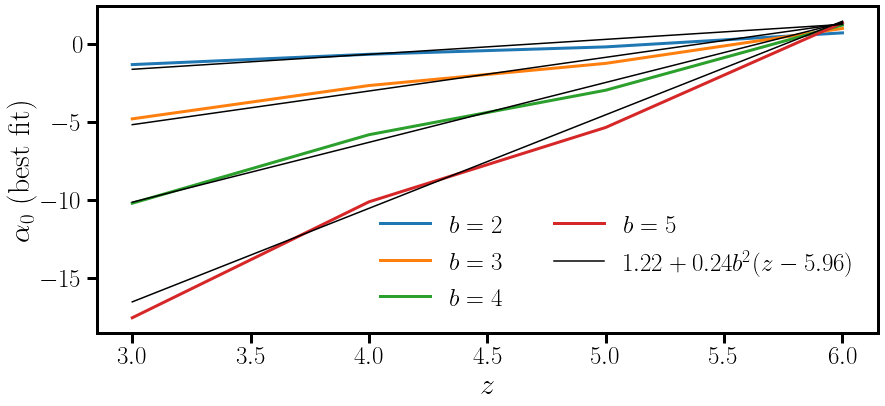

In [124]:
plt.figure(figsize=(14,6))
zs = np.array([3,4,5,6])

def sketchy_fit(zs,b): return 1.22 + 0.24*b**2*(zs-5.96)

alpha0s_b2 = np.array([-1.31935195,-0.65809596,-0.18420515,0.71498688])
alpha0s_b3 = np.array([-4.79938307,-2.66281887,-1.24095722,0.99833036])
alpha0s_b4 = np.array([-10.2127226,-5.81759548,-2.96337951,1.2157253])
alpha0s_b5 = np.array([-17.55936976,-10.12243213,-5.35147573,1.36718324])

plt.plot(zs,alpha0s_b2,label=r'$b=2$',lw=3)
plt.plot(zs,alpha0s_b3,label=r'$b=3$',lw=3)
plt.plot(zs,alpha0s_b4,label=r'$b=4$',lw=3)
plt.plot(zs,alpha0s_b5,label=r'$b=5$',lw=3)

plt.plot(zs,sketchy_fit(zs,2),c='k',label=r'$1.22+0.24 b^2(z-5.96)$')
plt.plot(zs,sketchy_fit(zs,3),c='k')
plt.plot(zs,sketchy_fit(zs,4),c='k')
plt.plot(zs,sketchy_fit(zs,5),c='k')

plt.xlabel(r'$z$')
plt.ylabel(r'$\alpha_0$ (best fit)')
plt.legend(loc='lower right',frameon=False,ncol=2)
plt.savefig('figures/alpha0_fitting1.pdf',bbox_inches='tight')

## Non-linear vs linear derivatives

In [4]:
params2 = {'output': 'mPk','P_k_max_h/Mpc': 40.,'non linear':'halofit', 
          'z_pk': '0.0,10','A_s': 2.10732e-9,'n_s': 0.96824,
          'alpha_s': 0.,'h': 0.6770, 'N_ur': 1.0196,
          'N_ncdm': 2,'m_ncdm': '0.01,0.05','tau_reio': 0.0568,
          'omega_b': 0.02247,'omega_cdm': 0.11923,'Omega_k': 0.}

cosmo2 = Class()
cosmo2.set(params2)
cosmo2.compute()
#
fLinear = fisherForecast(experiment=exp,cosmo=cosmo2,params=params2,khmin=5.e-4,\
                             khmax=1.,Nk=1000,Nmu=200,velocileptors=False,linear=True,name='Linear')

In [5]:
#params = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','fEDE','b','N',\
#                               'm_ncdm','N_ur','alpha_s','Omega_k'])
#fLinear.compute_derivatives()

In [6]:
x = compute_tracer_power_spectrum(fishcast,2.25)
ptFiducial = fishcast.get_f_at_fixed_mu(x,0)
x = compute_tracer_power_spectrum(fLinear,2.25)
linearFiducial = fLinear.get_f_at_fixed_mu(x,0)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


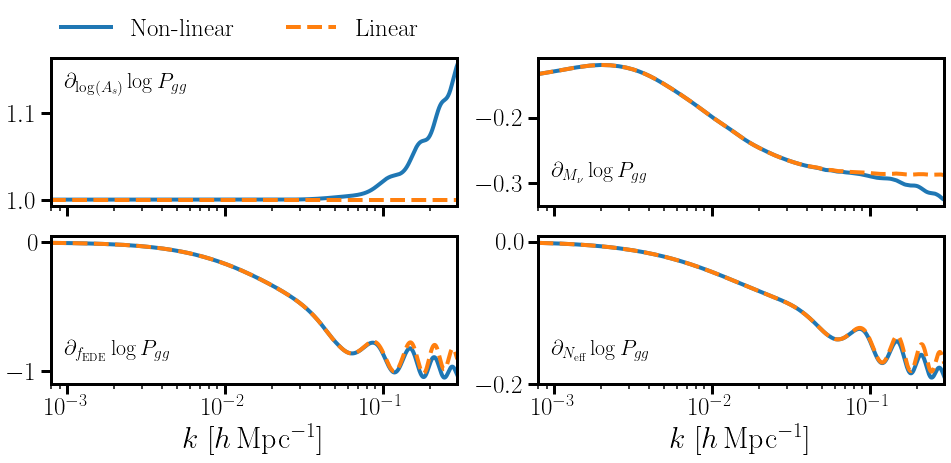

In [7]:
k = np.linspace(0.0008,0.5*0.14*(1+3.25),1000)

fig,axs = plt.subplots(2,2,figsize=(16,6), gridspec_kw={'hspace': 0.2,'wspace':0.2})

def get_derivatives(i,j,param):
   if param != 'fEDE': x = np.genfromtxt('output/MegaMapper/derivatives/'+param+'_225.txt')
   if param == 'fEDE': x = np.genfromtxt('output/MegaMapper/derivatives/fEDE_3562_225.txt')
   x1 = fishcast.get_f_at_fixed_mu(x,0)
   x = fLinear.compute_dPdp(param,2.25,five_point=True)
   x2 = fLinear.get_f_at_fixed_mu(x,0)
   axs[i,j].semilogx(k,x1(k)/ptFiducial(k),lw=4,c='C0')
   axs[i,j].semilogx(k,x2(k)/linearFiducial(k),lw=4,ls='--',c='C1')
   return
   

get_derivatives(0,0,'log(A_s)')
get_derivatives(0,1,'m_ncdm')
get_derivatives(1,0,'fEDE')
get_derivatives(1,1,'N_ur')

axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])

axs[0,0].plot([],[],c='C0',label=r'Non-linear',lw=4)
axs[0,0].plot([],[],c='C1',label='Linear',lw=4,ls='--')
axs[0,0].legend(loc=(0,1.05),frameon=False,ncol=3)

axs[0,0].text(0.03,0.8,r'$\partial_{\log(A_s)} \log P_{gg}$',transform=axs[0,0].transAxes)
axs[0,1].text(0.03,0.2,r'$\partial_{M_\nu}\log P_{gg}$',transform=axs[0,1].transAxes)
axs[1,0].text(0.03,0.2,r'$\partial_{f_\text{EDE}} \log P_{gg}$',transform=axs[1,0].transAxes)
axs[1,1].text(0.03,0.2,r'$\partial_{N_\text{eff}} \log P_{gg}$',transform=axs[1,1].transAxes)

axs[0,0].set_xlim(k[0],k[-1])
axs[0,1].set_xlim(k[0],k[-1])
axs[1,0].set_xlim(k[0],k[-1])
axs[1,1].set_xlim(k[0],k[-1])

axs[1,0].set_xlabel(r'$k$ [$h\,$Mpc$^{-1}$]')
axs[1,1].set_xlabel(r'$k$ [$h\,$Mpc$^{-1}$]')

plt.savefig('figures/lin_vs_nonlin.pdf',bbox_inches='tight')

## When do redshift errors start to matter?

In [240]:
def H(z): return cosmo.Hubble(z)*(299792.458)/params['h']
def sigma_min(z): return np.sqrt(fishcast.Sigma2(z)) * H(z) / (1+z) / 299792.458

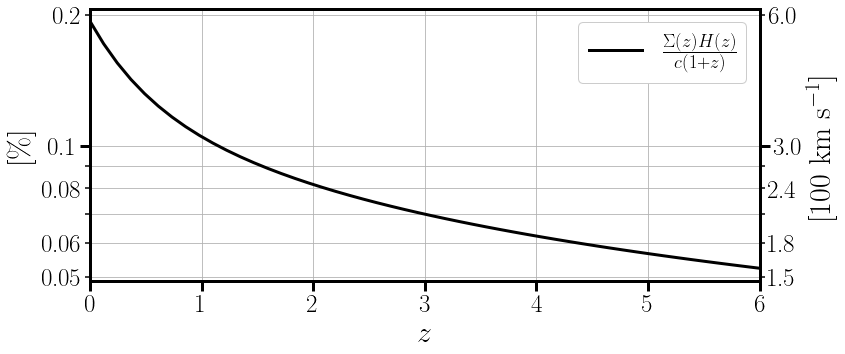

In [255]:
fig, ax = plt.subplots(figsize=(12,5))

zs = np.linspace(0,6)
ax.semilogy(zs,[sigma_min(z)*100. for z in zs],lw=3,c='k',label=r'$\frac{\Sigma(z)H(z)}{c(1+z)}$')
ax.set_xlim(0,6)
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'[\%]')

def conversion(x): return x*3.e5/100./100.
def conversion_inverse(x): return x*100.*100./3.e5

secax = ax.secondary_yaxis('right', functions=(conversion,conversion_inverse))
secax.set_ylabel(r'[100 km s$^{-1}$]')

ax.set_yticks([0.1])
ax.set_yticks([0.05,0.06,0.07,0.08,0.09,0.2],minor=True)
ax.set_yticklabels(['0.1'])
ax.set_yticklabels(['0.05','0.06','','0.08','','0.2'],minor=True)

secax.set_yticks(conversion(np.array([0.1])))
secax.set_yticks(conversion(np.array([0.05,0.06,0.07,0.08,0.09,0.2])),minor=True)
secax.set_yticklabels([str(conversion(0.1))])
secax.set_yticklabels([str(conversion(0.05)),str(conversion(0.06)),'',str(conversion(0.08)),'',str(conversion(0.2))],minor=True)

plt.legend(loc='upper right',fontsize='large',framealpha=1)
plt.grid(which='both')
plt.savefig('figures/redshift_uncertainty.pdf',bbox_inches='tight')

# Make the basic plots first

In [127]:
zs = np.linspace(2,5,100)
knl = np.array([1./np.sqrt(fishcast.Sigma2(z)) for z in zs])  # h/Mpc
n = np.array([LBGn(fishcast, z) for z in zs])
b = np.array([LBGb(fishcast,z) for z in zs])
chi = np.array([(1.+z)*cosmo.angular_distance(z) for z in zs]) * params['h']  # Mpc/h

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


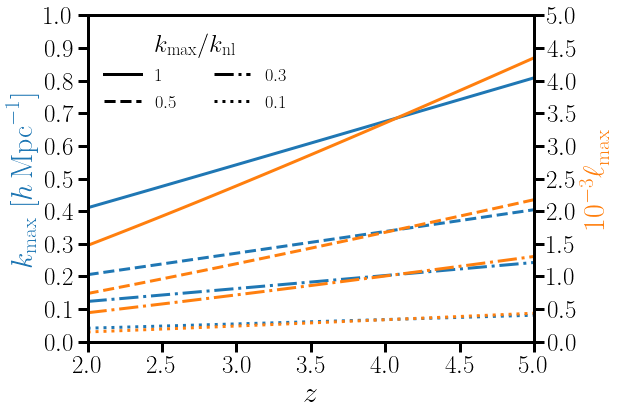

In [128]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(8,6))
# make a plot
ax.plot(zs,knl,color='C0',lw=3,label='$1$')
ax.plot(zs,0.5*knl,color='C0',lw=3,label='$0.5$',ls='dashed')
ax.plot(zs,0.3*knl,color='C0',lw=3,label='$0.3$',ls='dashdot')
ax.plot(zs,0.1*knl,color='C0',lw=3,label='$0.1$',ls='dotted')
#for y in np.linspace(0,1,6): ax.axhline(y,0,5,ls='--',lw=0.2,color='k')
# set x-axis label
ax.set_xlabel(r'$z$')
# set y-axis label
ax.set_ylabel(r'$k_\text{max}$ [$h\,{\rm Mpc}^{-1}$]',color='C0')
ax.set_yticks(ticks=np.linspace(0,1,11))
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.set_yticks(ticks=np.linspace(0,5,11))
# make a plot with different y-axis using second axis object
ax2.plot(zs,knl*chi/1000,color='C1',lw=3,label='$1$')
ax2.plot(zs,0.5*knl*chi/1000,color='C1',lw=3,label='$0.5$',ls='dashed')
ax2.plot(zs,0.3*knl*chi/1000,color='C1',lw=3,label='$0.3$',ls='dashdot')
ax2.plot(zs,0.1*knl*chi/1000,color='C1',lw=3,label='$0.1$',ls='dotted')
ax2.set_ylabel(r'$10^{-3}\ell_\text{max}$',color='C1')
plt.xticks(ticks=np.linspace(2,5,7))
plt.xlim(2,5)
leg = ax.legend(loc='upper left',title=r'$k_\text{max}/k_\text{nl}$',ncol=2,fontsize='small',frameon=False)
for i in range(4): leg.legendHandles[i].set_color('k')
ax2.set_ylim(0,5)
ax.set_ylim(0,1)
plt.savefig('figures/kmax.pdf',bbox_inches='tight')

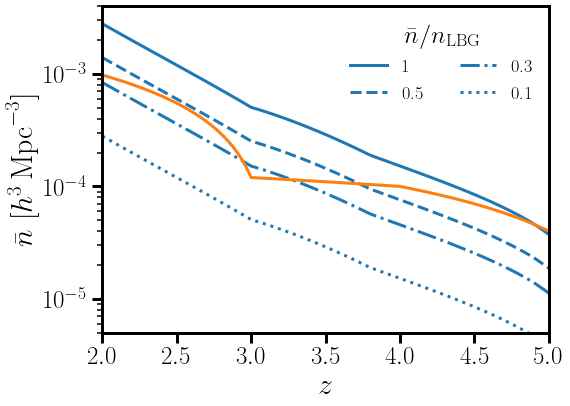

In [129]:
plt.figure(figsize=(8,6))

plt.semilogy(zs,n,color='C0',lw=3,label='1')
plt.semilogy(zs,0.5*n,color='C0',lw=3,label='0.5',ls='dashed')
plt.semilogy(zs,0.3*n,color='C0',lw=3,label='0.3',ls='dashdot')
plt.semilogy(zs,0.1*n,color='C0',lw=3,label='0.1',ls='dotted')

mega_n_ideal = interp1d([2,2.5,3,3.5,4,4.5,5],np.array([25,12,6.0,3.0,1.5,0.8,0.4])*(1e-4),kind='linear')
mega_n_fid = interp1d([2,3,4,5],np.array([9.8,1.2,1.0,0.4])*(1e-4),kind='linear')
#plt.semilogy(zs,mega_n_ideal(zs),c='C1',lw=3)
plt.semilogy(zs,mega_n_fid(zs),c='C1',lw=3)

#for y in np.linspace(4e-5,1e-4,4): plt.axhline(y,0,5,ls='--',lw=0.2,color='k')
#for y in np.linspace(1e-4,1e-3,5)[1:]: plt.axhline(y,0,5,ls='--',lw=0.2,color='k')
#for y in np.linspace(1e-3,1e-2,5)[1:]: plt.axhline(y,0,5,ls='--',lw=0.2,color='k')

plt.legend(loc='upper right',frameon=False,title=r'$\bar{n}/n_\text{LBG}$',
           fontsize='small',ncol=2)
plt.xticks(ticks=np.linspace(2,5,7))
plt.xlim(2,5)
plt.ylim(5e-6,4e-3)
plt.xlabel(r'$z$')
plt.ylabel(r'$\bar{n}\,\,[h^{3}\,{\rm Mpc}^{-3}]$')
plt.savefig('figures/nbar.pdf',bbox_inches='tight')

## $b^2 n$ for various surveys

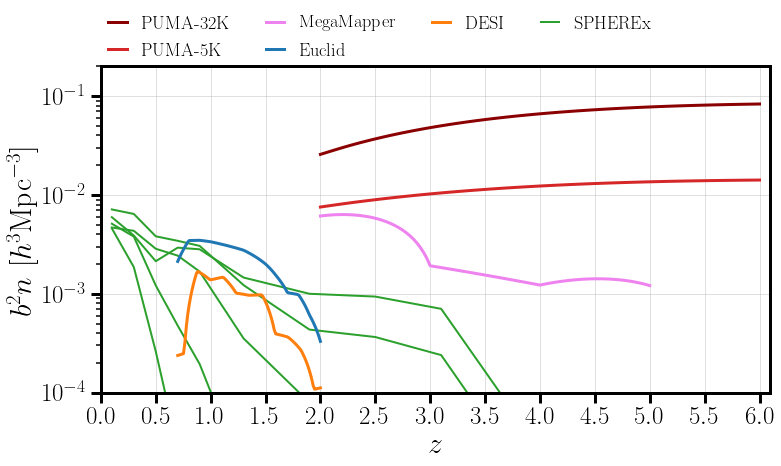

In [9]:
zz_kinda_low = np.linspace(2.,5.,100)
mega_b_ideal = interp1d([2,2.5,3,3.5,4,4.5,5],[2.5,3.3,4.1,4.9,5.8,6.6,7.4],kind='linear')(zz_kinda_low)
mega_n_ideal = interp1d([2,2.5,3,3.5,4,4.5,5],np.array([25,12,6.0,3.0,1.5,0.8,0.4])*(1e-4),kind='linear')(zz_kinda_low)
mega_b_fid = interp1d([2,3,4,5],[2.5,4.0,3.5,5.5],kind='linear')(zz_kinda_low)
mega_n_fid = interp1d([2,3,4,5],np.array([9.8,1.2,1.0,0.4])*(1e-4),kind='linear')(zz_kinda_low)

zz = np.linspace(2.,6.,100)
HIbias = np.array([HIb(z) for z in zz])
fishcast.experiment.Ndetectors = 32e3
HInumber_density32 = np.array([HIneff(fishcast,z)[1000] for z in zz])
fishcast.experiment.Ndetectors = 5e3
HInumber_density5 = np.array([HIneff(fishcast,z)[1000] for z in zz])

zz_low = np.linspace(0.7,2.,100)
Euclid_b = np.sqrt(1+zz_low)
Euclid_n = Euclidn(zz_low)

zz_lower = np.linspace(0.6,1.7,100)
ELGbias = np.array([ELGb(fishcast,z) for z in zz_lower])
ELGnumber_density = np.array([ELGn(fishcast,z) for z in zz_lower])


##################################################################################
z_spherex = np.array([0.1,0.3,0.5,0.7,0.9,1.3,1.9,2.5,3.1,3.7,4.3])

n1_spherex = np.array([6.210e-03,1.540e-03,4.930e-05,1.430e-06,1.000e-09,1.000e-09,1.000e-09,1.000e-09,1.000e-09,2.210e-07,1.000e-09])
n2_spherex = np.array([8.200e-03,4.580e-03,7.180e-04,1.190e-04,2.310e-05,5.250e-07,2.170e-07,4.300e-07,1.000e-09,1.000e-09,1.000e-09])
n3_spherex = np.array([8.110e-03,6.150e-03,2.360e-03,1.440e-03,6.550e-04,4.200e-05,3.910e-06,3.700e-06,1.000e-09,4.420e-07,1.000e-09])
n4_spherex = np.array([1.340e-02,1.030e-02,4.320e-03,2.840e-03,2.120e-03,3.060e-04,4.240e-05,2.400e-05,1.040e-05,6.640e-07,4.850e-07])
n5_spherex = np.array([1.150e-02,6.390e-03,2.580e-03,2.930e-03,2.330e-03,5.050e-04,1.480e-04,9.150e-05,4.630e-05,2.430e-06,1.160e-06])

#bias; each row is a galaxy sample (i.e. a sigz0 bin), each column a redshift bin
b1_spherex = np.array([0.860,1.100,2.300,4.400,1.000,1.000,1.000,1.000,1.000,7.300,1.000])
b2_spherex = np.array([0.790,0.910,1.300,2.000,2.900,5.300,6.200,6.200,1.000,1.000,1.000])
b3_spherex = np.array([0.760,0.840,1.100,1.300,1.600,2.900,4.500,4.900,1.000,6.700,1.000])
b4_spherex = np.array([0.730,0.790,0.940,1.100,1.200,2.000,3.200,3.900,4.800,6.300,7.200])
b5_spherex = np.array([0.720,0.780,0.910,1.000,1.100,1.700,2.600,3.200,3.900,5.700,6.500])
#################################################################################


plt.figure(figsize=(12,6))

plt.semilogy(zz,HInumber_density32*HIbias**2.,c='darkred',lw=3,label=r'PUMA-32K')
plt.semilogy(zz,HInumber_density5*HIbias**2.,c='C3',lw=3,label=r'PUMA-5K')

#plt.semilogy(zz_kinda_low,mega_n_ideal*mega_b_ideal**2.,c='blueviolet',lw=3,label=r'MegaMapper (idealised)')
#plt.semilogy(zz_kinda_low,mega_n_fid*mega_b_fid**2.,c='violet',lw=3,label=r'MegaMapper (fiducial)')
#plt.semilogy(zs,n*b**2, c='cyan', lw=2,label='toy model')
plt.semilogy(zz_kinda_low,mega_n_fid*mega_b_fid**2.,c='violet',lw=3,label=r'MegaMapper')

plt.semilogy(zz_low,Euclid_n*Euclid_b**2.,c='C0',lw=3,label=r'Euclid',zorder=3)
plt.semilogy(zz_low,ELGnumber_density*ELGbias**2.,c='C1',lw=3,label=r'DESI',zorder=3)

plt.semilogy(z_spherex,n1_spherex*b1_spherex**2,c='C2',lw=2,label=r'SPHEREx')
plt.semilogy(z_spherex,n2_spherex*b2_spherex**2,c='C2',lw=2)
plt.semilogy(z_spherex,n3_spherex*b3_spherex**2,c='C2',lw=2)
plt.semilogy(z_spherex,n4_spherex*b4_spherex**2,c='C2',lw=2)
plt.semilogy(z_spherex,n5_spherex*b5_spherex**2,c='C2',lw=2)

plt.xlabel(r'$z$')
plt.ylabel(r'$b^2n\,\,$[$h^3$\text{Mpc}$^{-3}$]')
plt.legend(loc=(0,1),frameon=False,ncol=4,fontsize='small',handlelength=1)
plt.xlim(0.,6.1)
plt.ylim(1.e-4,0.2)
plt.xticks(ticks=[0.,0.5,1.,1.5,2.0,2.5,3.,3.5,4.,4.5,5.,5.5,6.])
plt.grid(alpha=0.5)
plt.savefig('figures/b2n.pdf',bbox_inches='tight')

In [239]:
fishcast.comov_vol(2,6)/fishcast.comov_vol(0.7,2)

3.3886866882158024

## Figure of merit ($N_\text{modes}$)

### Code for calculating the number of linear CMB modes

In [10]:
# CMB N_modes
params_CMB = {'output': 'tCl, pCl, lCl', 'modes':'s,t',
    'l_max_scalars': 10000, 'l_max_tensors': 1000,
    'lensing': 'yes',
    'r': 0.01,
    'A_s': 2.10732e-9,
    'n_s': 0.96824, 
    'h': 0.6770,
    'N_ur': 2.0328,
    'N_ncdm': 1,
    'm_ncdm': 0.06,
    'tau_reio': 0.0568,
    'omega_b': 0.022447,
    'omega_cdm': 0.11923}  

cosmo_CMB = Class()
cosmo_CMB.set(params_CMB)
cosmo_CMB.compute()
cls = cosmo_CMB.raw_cl(10000)

Tcmb = 2.7255e6 #muK

def N(l,noise,FWHM):
   noise *= 0.000290888 # convert muK-arcmin to muK-radians
   FWHM *= 0.000290888 # convert arcmin to radians
   return noise**2. * np.exp(FWHM**2. * l**2. / (8.*np.log(2.)))

def covariance(l,noise,FWHM):
   tt = cls['tt'][l] * Tcmb**2.
   if l>3000: tt += 1.e6
   te = np.abs(cls['te'][l]) * Tcmb**2.
   ee = cls['ee'][l] * Tcmb**2.
   n = N(l,noise,FWHM)
   C = np.array([[ (tt+n)**2. , (tt+n)*te                     , te**2.          ],
                 [ (tt+n)*te  , (te**2 + (tt+n)*(ee+2.*n))/2. , (ee+2.*n)*te    ],
                 [ te**2.     , (ee+2.*n)*te                  , (ee+2.*n)**2.   ]])
   C /= (2.*l+1.)/2.
   return C

def N_modes_CMB(noise,FWHM):
   '''
   noise in muK-arcmin
   FWHM in arcmin
   '''
   ell = cls['ell'][2:]
   def F_AA(l):
      C = covariance(l,noise,FWHM)
      Cinv = np.linalg.inv(C)
      mu = np.array([cls['tt'][l],cls['te'][l],cls['ee'][l]]) * Tcmb**2.
      return np.dot(np.dot(mu,Cinv),mu)
   result = sum([F_AA(l) for l in ell])
   return 2.*result

SO = N_modes_CMB(7.,1.4)/2.  # dividing by 2 here to account for fsky=0.5
S4 = N_modes_CMB(1.5,1.4)/2.

### Calculate the contribution to $N_\text{modes}$ from DESI, add to the other LSS experiments

In [11]:
DESI = experiment(zmin=0.6, zmax=1.7, nbins=5, fsky=0.34, sigma_z=0.0, ELG=True)
desiCast = fisherForecast(experiment=DESI,cosmo=cosmo,params=params,khmin=5.e-4,\
                          khmax=1.,Nk=200,Nmu=200,velocileptors=False)
desi_Nmodes = desiCast.Nmodes(0.6,1.7,60)

### Create objects for MegaMapper and cosmic variance limited experiment

In [ ]:
# make sure to turn velocileptors off

In [13]:
mega_zmax = np.linspace(2.2,5,50) 
mega_fiducial_Nmodes = np.array([megaCast_fiducial.Nmodes(2.,z,50) for z in mega_zmax])

In [14]:
puma_zmax = np.linspace(2.2,6,50)
puma_pessimistic5_Nmodes = np.array([pumaCast_pessimistic5.Nmodes(2.,z,50) for z in puma_zmax])

In [15]:
puma_pessimistic32_Nmodes = np.array([pumaCast_pessimistic32.Nmodes(2.,z,50) for z in puma_zmax])

In [16]:
puma_optimistic5_Nmodes = np.array([pumaCast_optimistic5.Nmodes(2.,z,50) for z in puma_zmax])

In [17]:
puma_optimistic32_Nmodes = np.array([pumaCast_optimistic32.Nmodes(2.,z,50) for z in puma_zmax])

In [18]:
cv_Nmodes = np.array([cv_f.Nmodes(2.,z,50) for z in puma_zmax])
upper_limit = np.ones(len(mega_zmax))*(1.e23)

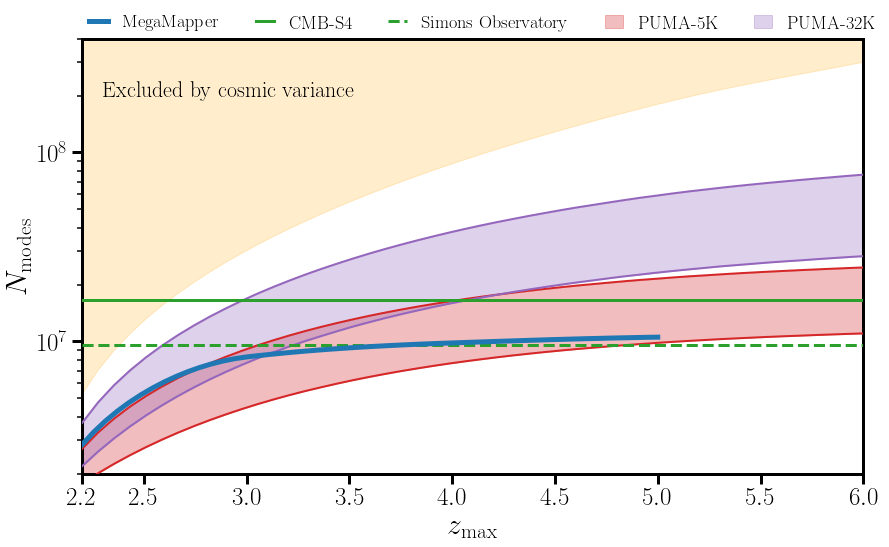

In [25]:
plt.figure(figsize=(14,8))

#plt.semilogy(mega_zmax,mega_ideal_Nmodes+desi_Nmodes,c='C0',lw=3.,label='MegaMapper (idealised)',zorder=3)
#plt.semilogy(mega_zmax,mega_fiducial_Nmodes+desi_Nmodes,c='C0',lw=3.,label='MegaMapper (fiducial)',zorder=3,ls='--')
#plt.fill_between(mega_zmax,mega_fiducial_Nmodes+desi_Nmodes,mega_ideal_Nmodes+desi_Nmodes,color='C0',alpha=0.3)
plt.semilogy(mega_zmax,mega_fiducial_Nmodes+desi_Nmodes,c='C0',lw=5.,label='MegaMapper',zorder=5,ls='-')

plt.semilogy(puma_zmax,puma_optimistic5_Nmodes+desi_Nmodes,c='C3',lw=2.,zorder=3)
plt.semilogy(puma_zmax,puma_pessimistic5_Nmodes+desi_Nmodes,c='C3',lw=2.,zorder=3,ls='-')
plt.fill_between(puma_zmax,puma_pessimistic5_Nmodes+desi_Nmodes,puma_optimistic5_Nmodes+desi_Nmodes,color='C3',alpha=0.3,label='PUMA-5K')

plt.semilogy(puma_zmax,puma_optimistic32_Nmodes+desi_Nmodes,c='C4',lw=2.,zorder=3)
plt.semilogy(puma_zmax,puma_pessimistic32_Nmodes+desi_Nmodes,c='C4',lw=2.,zorder=3,ls='-')
plt.fill_between(puma_zmax,puma_pessimistic32_Nmodes+desi_Nmodes,puma_optimistic32_Nmodes+desi_Nmodes,color='C4',alpha=0.3,label='PUMA-32K')

plt.semilogy(puma_zmax,S4*np.ones(len(puma_zmax)),lw=3,ls='-',color='C2',label='CMB-S4',zorder=4)
plt.semilogy(puma_zmax,SO*np.ones(len(puma_zmax)),lw=3,ls='--',color='C2',label='Simons Observatory',zorder=4)
#plt.fill_between(puma_zmax,SO*np.ones(len(puma_zmax)),S4*np.ones(len(puma_zmax)),color='C2',alpha=0.3)

plt.fill_between(puma_zmax,cv_Nmodes+desi_Nmodes,upper_limit,color='orange',alpha=0.2)

plt.text(2.3,2.e8,'Excluded by cosmic variance')

plt.xticks(ticks=[2.2,2.5,3.,3.5,4.,4.5,5.,5.5,6.])

plt.xlabel(r'$z_\text{max}$')
plt.ylabel(r'$N_\text{modes}$')
plt.legend(loc=(0,1),fontsize='small',frameon=False,ncol=5,handlelength=1)
plt.xlim(2.2,6)
plt.ylim(2.e6,4.e8)
plt.savefig('figures/fom.pdf',bbox_inches='tight')

## EDE power spectrum vs $\Lambda$CDM

# A bunch of Fisher matrices

In [7]:
def compute_specific_Fisher(nratio,alpha,sigma_z):
   basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','fEDE','b','N',\
                                 'm_ncdm','N_ur','A_lin','alpha_s','Hz','Da','b2',\
                                 'bs','alpha0','alpha2','alpha4','sn2','Omega_k'])
   fishcast.experiment = experiment(zmin=2., zmax=5., nbins=6, fsky=0.5, sigma_z=sigma_z, LBG=True,\
                                 custom_n=True, n=lambda z: nratio*LBGn(fishcast,z))
   return np.array([fishcast.gen_fisher(basis,alpha=alpha,zbin_indices=np.array([i]) ) for i in range(6)])

nratios = np.array([0.1,0.3,0.5,1.])
kratios = np.array([0.1,0.3,0.5,1.])
sigmazs = np.array([0.,0.0001,0.001])
zmaxs = np.array([2.5,3.,3.5,4.,4.5,5.])

masterKey = []
Fmaster = []

#for nratio in nratios:
#   for kratio in kratios: 
#      for sigmaz in sigmazs:
#         masterKey.append([nratio,kratio,sigmaz])
#         Fmaster.append(compute_specific_Fisher(nratio,kratio,sigmaz))
            
#masterKey = np.array(masterKey)
#Fmaster = np.array(Fmaster)

#np.savetxt('output/masterKey.txt',masterKey.flatten())
#np.savetxt('output/Fmaster.txt',Fmaster.flatten())

masterKey = np.genfromtxt('output/masterKey.txt').reshape((48,3))
Fmaster = np.genfromtxt('output/Fmaster.txt').reshape((48,6,22,22))

In [9]:
def find_specific_Fisher(nratio,alpha,sigma_z,basis):
   index=-1.
   for i in range(len(masterKey)):
      if list(masterKey[i]) == [nratio,alpha,sigma_z]: 
         index=i
   if index==-1.: print('oops')
   result = Fmaster[index].copy()
   old_basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','fEDE','b','N',\
                                 'm_ncdm','N_ur','A_lin','alpha_s','Hz','Da','b2',\
                                 'bs','alpha0','alpha2','alpha4','sn2','Omega_k'])
   indices = [np.where(basis[i] == old_basis)[0][0] for i in range(len(basis))]
   return np.array([result[i][indices][:,indices] for i in range(len(result))])

# What happens if you get rid of a $z$-bin?

In [9]:
basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','N',\
                                 'b2','bs','alpha0','alpha2','alpha4','sn2','m_ncdm'])

F = find_specific_Fisher(1.,1.,0.,basis)

basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','N',\
                                 'bs','alpha0','alpha2','alpha4','sn2','m_ncdm'])

F1 = find_specific_Fisher(1.,1.,0.,basis)

basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','N',\
                                 'alpha0','alpha2','alpha4','sn2','m_ncdm'])

F2 = find_specific_Fisher(1.,1.,0.,basis)

In [10]:
def F_removed(F,i):
   x = [0,1,2,3,4,5]
   x.remove(i)
   x = np.array(x)
   result = F[x[0]].copy()
   for i in range(1,len(x)): result+= F[x[i]]
   return result

def F_sum(F,i):
   result = F[0].copy()
   for j in range(1,i): result += F[j]
   return result

In [11]:
def F_one_parameter_extension(f,param,base=[0,1,2,3,4,5,7,15,16,17,18,19,20,8]):
   basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','fEDE','b','N',\
                                 'm_ncdm','N_ur','A_lin','alpha_s','Hz','Da','b2',\
                                 'bs','alpha0','alpha2','alpha4','sn2','Omega_k'])
   index = np.where(basis == param)[0][0]
   idk = base+[index]
   return f[idk][:,idk]

In [12]:
sigmas_ncdm = np.array([np.sqrt(np.linalg.inv(F_removed(F,i))[-1,-1]) \
                        for i in np.array([0,1,2,3,4,5])])*1000.

sigmas_ncdm_no_b2 = np.array([np.sqrt(np.linalg.inv(F_removed(F1,i))[-1,-1]) \
                        for i in np.array([0,1,2,3,4,5])])*1000.

sigmas_ncdm_no_b2bs = np.array([np.sqrt(np.linalg.inv(F_removed(F2,i))[-1,-1]) \
                        for i in np.array([0,1,2,3,4,5])])*1000.

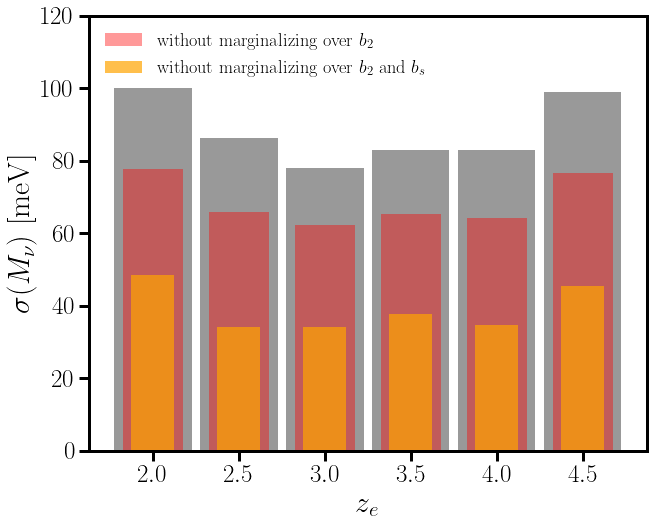

In [13]:
plt.figure(figsize=(10,8))

plt.xticks(ticks=[1,2,3,4,5,6],labels=[r'$2.0$',r'$2.5$',r'$3.0$',r'$3.5$',r'$4.0$',r'$4.5$'])
plt.bar([1,2,3,4,5,6],sigmas_ncdm,color='black',width=0.9,alpha=0.4)
plt.bar([1,2,3,4,5,6],sigmas_ncdm_no_b2,color='red',width=0.7,alpha=0.4,label='without marginalizing over $b_2$')
plt.bar([1,2,3,4,5,6],sigmas_ncdm_no_b2bs,color='orange',width=0.5,alpha=0.7,label='without marginalizing over $b_2$ and $b_s$')
plt.legend(loc='upper left',fontsize='small',frameon=False)
plt.ylabel(r'$\sigma(M_\nu)\,\,[{\rm meV}]$')
plt.xlabel(r'$z_e$')
plt.ylim(0,120)
plt.savefig('figures/sigma_mcdm_without_one_zbin.pdf',bbox_inches='tight')

For an experiment that covers $z\in [2,z_e]\cup[z_e+0.5,5]$

# SO Prior

In [5]:
SO = np.zeros((15,15))

# in H_0, tau_reio, omega_nu, omega_b, omega_cdm, A_s, n_s basis
tmp = np.genfromtxt('input/LAT_baseline_fsky04_fish_mat.dat')
# in h, tau_reio, omega_nu, omega_b, omega_cdm, log(A_s), n_s basis
tmp[0,:] *= 100.
tmp[:,0] *= 100.
tmp[5,:] *= params['A_s']
tmp[:,5] *= params['A_s']
tmp[2,:] /= 94.
tmp[:,2] /= 94.

mapping = {0:0, 1:5, 2:4, 3:6, 4:3, 5:1, 14:2}
for i in range(15):
    for j in range(15):
        try:
           SO[i,j] = tmp[mapping[i],mapping[j]]
        except:
           SO[i,j] = 0.

# Other plots

In [3]:
def find_speficicer_Fisher(nratio,kratio,sigmaz,zmax,param,nob2bs=False):
   basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','N',\
                                 'b2','bs','alpha0','alpha2','alpha4','sn2',param])
   if nob2bs: basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','N',\
                                 'alpha0','alpha2','alpha4','sn2',param])
   result = find_specific_Fisher(nratio,kratio,sigmaz,basis)
   zmax_index = int(2.*(zmax-2.))
   return sum(result[:zmax_index])

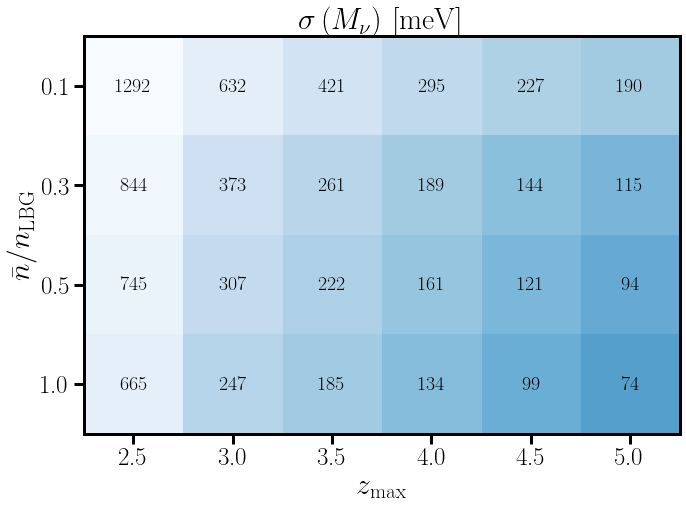

In [16]:
sigmas = np.zeros((len(nratios),len(zmaxs)))
for i,nratio in enumerate(nratios):
   for j,zmax in enumerate(zmaxs):
      sigmas[i,j] = np.sqrt(np.linalg.inv(find_speficicer_Fisher(nratio,1.,0.,zmax,'m_ncdm'))[-1,-1])*1000.
    
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(np.log10(sigmas),cmap='Blues_r',vmin=1,vmax=3)
ax.set_yticks(np.arange(len(nratios)))
ax.set_xticks(np.arange(len(zmaxs)))
ax.set_yticklabels(nratios.astype(str))
ax.set_xticklabels(zmaxs.astype(str))
for i in range(len(nratios)):
    for j in range(len(zmaxs)):
        ax.text(j, i, str(int(sigmas[i, j])),ha="center", va="center", color="k",fontsize=20)
ax.set_xlabel(r'$z_\text{max}$')
ax.set_ylabel(r'$\bar{n}/n_\text{LBG}$')
ax.set_title(r'$\sigma\left(M_\nu\right)\,{\rm [meV]}$')
fig.tight_layout()
plt.savefig('figures/sigma_mnu_vs_n_and_zmax.pdf',bbox_inches='tight')

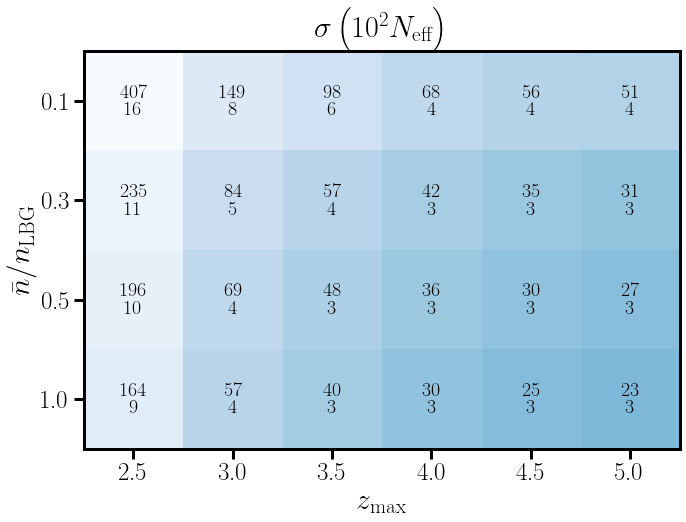

In [13]:
byeNeutrino = np.ones(SO.shape)
byeNeutrino[-1,:] = 0.
byeNeutrino[:,-1] = 0.

sigmas = np.zeros((len(nratios),len(zmaxs)))
sigmas_withSO = np.zeros((len(nratios),len(zmaxs)))
for i,nratio in enumerate(nratios):
   for j,zmax in enumerate(zmaxs):
      sigmas[i,j] = np.sqrt(np.linalg.inv(find_speficicer_Fisher(nratio,1.,0.,zmax,'N_ur'))[-1,-1])*100.
      sigmas_withSO[i,j] = np.sqrt(np.linalg.inv(find_speficicer_Fisher(nratio,1.,0.,zmax,'N_ur')+SO*byeNeutrino)[-1,-1])*100.
    
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(np.log10(sigmas),cmap='Blues_r',vmin=0,vmax=2.5)
ax.set_yticks(np.arange(len(nratios)))
ax.set_xticks(np.arange(len(zmaxs)))
ax.set_yticklabels(nratios.astype(str))
ax.set_xticklabels(zmaxs.astype(str))
for i in range(len(nratios)):
    for j in range(len(zmaxs)):
        ax.text(j, i, str(int(sigmas[i, j])),ha="center", va="bottom", color="k",fontsize=20)
        ax.text(j, i, str(int(sigmas_withSO[i, j])),ha="center", va="top", color="k",fontsize=20)
ax.set_xlabel(r'$z_\text{max}$')
ax.set_ylabel(r'$\bar{n}/n_\text{LBG}$')
ax.set_title(r'$\sigma\left(10^2N_\text{eff}\right)$')
fig.tight_layout()
plt.savefig('figures/sigma_neff_vs_n_and_zmax.pdf',bbox_inches='tight')

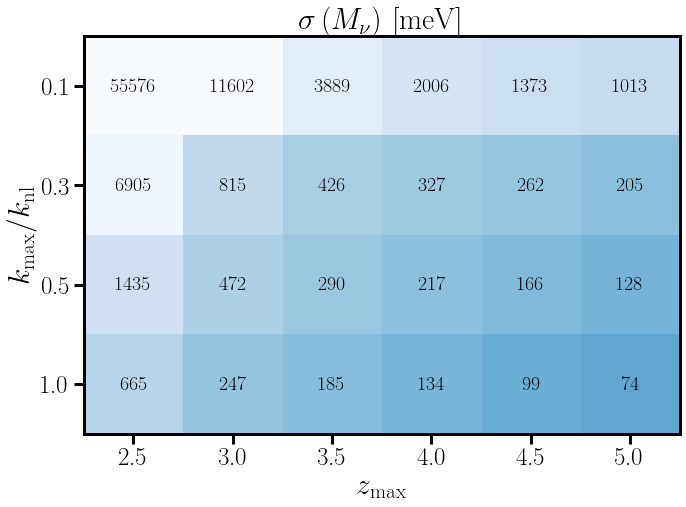

In [19]:
sigmas = np.zeros((len(kratios),len(zmaxs)))
for i,kratio in enumerate(kratios):
   for j,zmax in enumerate(zmaxs):
      sigmas[i,j] = np.sqrt(np.linalg.inv(find_speficicer_Fisher(1.,kratio,0.,zmax,'m_ncdm'))[-1,-1])*1000.
    
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(np.log10(sigmas),cmap='Blues_r',vmin=0,vmax=4)
ax.set_yticks(np.arange(len(kratios)))
ax.set_xticks(np.arange(len(zmaxs)))
ax.set_yticklabels(kratios.astype(str))
ax.set_xticklabels(zmaxs.astype(str))
for i in range(len(kratios)):
    for j in range(len(zmaxs)):
        ax.text(j, i, str(int(sigmas[i, j])),ha="center", va="center", color="k",fontsize=20)
ax.set_xlabel(r'$z_\text{max}$')
ax.set_ylabel(r'$k_\text{max}/k_\text{nl}$')
ax.set_title(r'$\sigma\left(M_\nu\right)\,{\rm [meV]}$')
fig.tight_layout()
plt.savefig('figures/sigma_mnu_vs_k_and_zmax.pdf',bbox_inches='tight')

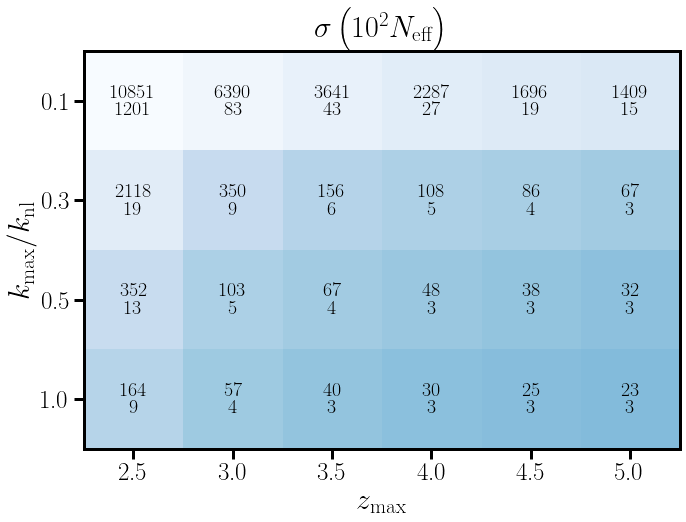

In [20]:
byeNeutrino = np.ones(SO.shape)
byeNeutrino[-1,:] = 0.
byeNeutrino[:,-1] = 0.

sigmas = np.zeros((len(kratios),len(zmaxs)))
sigmas_withSO = np.zeros((len(kratios),len(zmaxs)))
for i,kratio in enumerate(kratios):
   for j,zmax in enumerate(zmaxs):
      sigmas[i,j] = np.sqrt(np.linalg.inv(find_speficicer_Fisher(1.,kratio,0.,zmax,'N_ur'))[-1,-1])*100.
      sigmas_withSO[i,j] = np.sqrt(np.linalg.inv(find_speficicer_Fisher(1.,kratio,0.,zmax,'N_ur')+SO*byeNeutrino)[-1,-1])*100.
    
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(np.log10(sigmas),cmap='Blues_r',vmin=-2,vmax=4)
ax.set_yticks(np.arange(len(kratios)))
ax.set_xticks(np.arange(len(zmaxs)))
ax.set_yticklabels(kratios.astype(str))
ax.set_xticklabels(zmaxs.astype(str))
for i in range(len(kratios)):
    for j in range(len(zmaxs)):
        ax.text(j, i, str(int(sigmas[i, j])),ha="center", va="bottom", color="k",fontsize=20)
        ax.text(j, i, str(int(sigmas_withSO[i, j])),ha="center", va="top", color="k",fontsize=20)
ax.set_xlabel(r'$z_\text{max}$')
ax.set_ylabel(r'$k_\text{max}/k_\text{nl}$')
ax.set_title(r'$\sigma\left(10^2 N_\text{eff}\right)$')
fig.tight_layout()
plt.savefig('figures/sigma_neff_vs_k_and_zmax.pdf',bbox_inches='tight')

# Distance constraints

In [ ]:
# 8 curves: kratio = 1,0.5   ;   nratio = 1,0.5    ;     sigma_z = 0.05, 0.01

find_speficicer_Fisher(1.,1.,0.01,5.,'Da')
find_speficicer_Fisher(1.,0.5,0.01,5.,'Da')
find_speficicer_Fisher(0.5,1.,0.01,5.,'Da')
find_speficicer_Fisher(0.5,0.5,0.01,5.,'Da')
find_speficicer_Fisher(1.,1.,0.05,5.,'Da')
find_speficicer_Fisher(1.,0.5,0.05,5.,'Da')
find_speficicer_Fisher(0.5,1.,0.05,5.,'Da')
find_speficicer_Fisher(0.5,0.5,0.05,5.,'Da')

find_speficicer_Fisher(1.,1.,0.01,5.,'Hz')
find_speficicer_Fisher(1.,0.5,0.01,5.,'Hz')
find_speficicer_Fisher(0.5,1.,0.01,5.,'Hz')
find_speficicer_Fisher(0.5,0.5,0.01,5.,'Hz')
find_speficicer_Fisher(1.,1.,0.05,5.,'Hz')
find_speficicer_Fisher(1.,0.5,0.05,5.,'Hz')
find_speficicer_Fisher(0.5,1.,0.05,5.,'Hz')
find_speficicer_Fisher(0.5,0.5,0.05,5.,'Hz')

In [ ]:
fishcast.cosmo.angular_distance(z)
   if param == 'Hz': fidval = fishcast.cosmo.Hubble(z)*(299792.458)/fishcast.params['h']

# EDE constraints

In [200]:
basis = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                                  'b','b2','bs','alpha0','alpha2','alpha4',\
                                  'N','sn2','fEDE'])
log10z_cs = np.linspace(1.5,6.5,20)

def sigmaFede(forecast,log10z_c,alpha):
   F = forecast.gen_fisher(basis,log10z_c=log10z_c,alpha=alpha)
   Finv = np.linalg.inv(F+SO_barebones(15)) 
   return np.sqrt(Finv[-1,-1])

In [202]:
desiEDE = np.array([sigmaFede(desiCast,log10z_c,0.5) for log10z_c in log10z_cs])

In [203]:
eucEDE = np.array([sigmaFede(eucCast,log10z_c,0.6) for log10z_c in log10z_cs])

In [204]:
megaEDE = np.array([sigmaFede(megaCast,log10z_c,0.5) for log10z_c in log10z_cs])

In [205]:
old = np.array([sigmaFede(megaCast,log10z_c,1.) for log10z_c in log10z_cs])

In [206]:
puma5optEDE = np.array([sigmaFede(puma5optCast,log10z_c,0.5) for log10z_c in log10z_cs])

In [207]:
puma5pessEDE = np.array([sigmaFede(puma5pessCast,log10z_c,0.5) for log10z_c in log10z_cs])

In [208]:
puma32optEDE = np.array([sigmaFede(puma32optCast,log10z_c,0.5) for log10z_c in log10z_cs])

In [209]:
puma32pessEDE = np.array([sigmaFede(puma32pessCast,log10z_c,0.5) for log10z_c in log10z_cs])

In [210]:
np.savetxt('output/DESI/desiEDE_constaints.txt',desiEDE)
np.savetxt('output/Euclid/eucEDE_constaints.txt',eucEDE)
np.savetxt('output/MegaMapper_fiducial/megaEDE_constaints.txt',megaEDE)
np.savetxt('output/PUMA/puma5optEDE_constaints.txt',puma5optEDE)
np.savetxt('output/PUMA/puma5pessEDE_constaints.txt',puma5pessEDE)
np.savetxt('output/PUMA/puma32optEDE_constaints.txt',puma32optEDE)
np.savetxt('output/PUMA/puma32pessEDE_constaints.txt',puma32pessEDE)

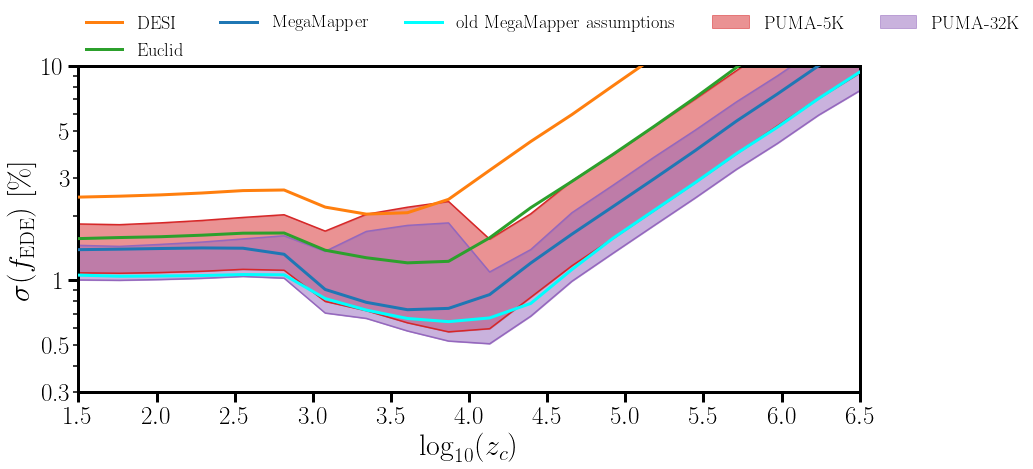

In [226]:
fig, ax = plt.subplots(figsize=(14,6))


ax.semilogy(log10z_cs,100.*desiEDE,label=r'DESI',lw=3,c='C1',zorder=3)
ax.semilogy(log10z_cs,100.*eucEDE,label=r'Euclid',lw=3,c='C2',zorder=3)
ax.semilogy(log10z_cs,100.*megaEDE,label=r'MegaMapper',lw=3,c='C0',zorder=3)

ax.semilogy(log10z_cs,100.*old*np.sqrt(0.34/0.5),label=r'old MegaMapper assumptions',lw=3,c='cyan',zorder=3)

ax.fill_between(log10z_cs,100*puma5pessEDE,100*puma5optEDE,color='C3',alpha=0.5,label='PUMA-5K')
ax.semilogy(log10z_cs,100*puma5pessEDE,c='C3')
ax.semilogy(log10z_cs,100*puma5optEDE,c='C3')
ax.fill_between(log10z_cs,100*puma32pessEDE,100*puma32optEDE,color='C4',alpha=0.5,label='PUMA-32K')
ax.semilogy(log10z_cs,100*puma32pessEDE,c='C4')
ax.semilogy(log10z_cs,100*puma32optEDE,c='C4')

ax.set_xlabel(r'$\log_{10}(z_c)$')
ax.set_ylabel(r'$\sigma(f_\text{EDE})$ [\%]')
ax.legend(loc=(0,1),fontsize='small',frameon=False,ncol=5)
plt.xticks(ticks=[1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5,6.,6.5])
plt.xlim(1.5,6.5)
plt.ylim(0.3,10.)
ax.set_yticks([1,10])
ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,2,3,4,5,6,7,8,9],minor=True)
ax.set_yticklabels(['1','10'])
ax.set_yticklabels(['0.3','','0.5','','','','','','3','','5','','','',''],minor=True)
plt.savefig('figures/fEDE_constraints.pdf',bbox_inches='tight')

In [225]:
np.mean(megaEDE/old)

1.3273810374503372

In [224]:
np.sqrt(0.5/0.34)

1.2126781251816647

In [232]:
np.sqrt(np.linalg.inv(Planck_barebones(6))[-1,-1])

0.002111025300069471

# $A_\text{lin}$ constraints

In [212]:
basis = np.array(['h','log(A_s)','n_s','omega_cdm','omega_b','tau_reio',\
                                  'b','b2','bs','alpha0','alpha2','alpha4',\
                                  'N','sn2','A_lin'])
omega_lins = np.logspace(np.log10(10),np.log10(250.),20)
def sigmaAlin(forecast,omega_lin,alpha):
   F = forecast.gen_fisher(basis,omega_lin=omega_lin,alpha=alpha)
   Finv = np.linalg.inv(F+SO_barebones(15)) 
   return np.sqrt(Finv[-1,-1])

In [213]:
desiAlin = np.array([sigmaAlin(desiCast,omega_lin,0.5) for omega_lin in omega_lins])

In [214]:
eucAlin = np.array([sigmaAlin(eucCast,omega_lin,0.6) for omega_lin in omega_lins])

In [215]:
megaAlin = np.array([sigmaAlin(megaCast,omega_lin,0.5) for omega_lin in omega_lins])

In [216]:
puma5optAlin = np.array([sigmaAlin(puma5optCast,omega_lin,0.5) for omega_lin in omega_lins])

In [227]:
puma5pessAlin = np.array([sigmaAlin(puma5pessCast,omega_lin,0.5) for omega_lin in omega_lins])

In [228]:
puma32optAlin = np.array([sigmaAlin(puma32optCast,omega_lin,0.5) for omega_lin in omega_lins])

In [233]:
puma32pessAlin = np.array([sigmaAlin(puma32pessCast,omega_lin,0.5) for omega_lin in omega_lins])

In [234]:
np.savetxt('output/DESI/desiAlin_constaints.txt',desiAlin)
np.savetxt('output/Euclid/eucAlin_constaints.txt',eucAlin)
np.savetxt('output/MegaMapper_fiducial/megaAlin_constaints.txt',megaAlin)
np.savetxt('output/PUMA/puma5optAlin_constaints.txt',puma5optAlin)
np.savetxt('output/PUMA/puma5pessAlin_constaints.txt',puma5pessAlin)
np.savetxt('output/PUMA/puma32optAlin_constaints.txt',puma32optAlin)
np.savetxt('output/PUMA/puma32pessAlin_constaints.txt',puma32pessAlin)

# Temporary plot

In [19]:
basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','N',\
                                 'b2','bs','alpha0','alpha2','alpha4','sn2','m_ncdm'])

fishcast.experiment = experiment(zmin=2., zmax=5., nbins=6, fsky=0.5, sigma_z=0., LBG=True,\
                                 custom_n=True, n=lambda z: 0.5*LBGn(fishcast,z))

alphas = np.linspace(0.1,1.,10)
F_fine_k_n_05 = np.array([fishcast.gen_fisher(basis,alpha=alpha) for alpha in alphas])

fishcast.experiment = experiment(zmin=2., zmax=5., nbins=6, fsky=0.5, sigma_z=0., LBG=True,\
                                 custom_n=True, n=lambda z: 1.*LBGn(fishcast,z))

alphas = np.linspace(0.1,1.,10)
F_fine_k_n_10 = np.array([fishcast.gen_fisher(basis,alpha=alpha) for alpha in alphas])

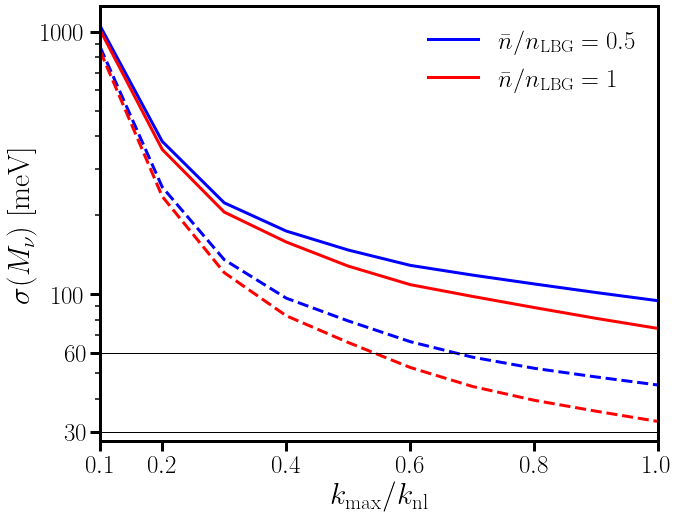

In [24]:
plt.figure(figsize=(10,8))
indices = [0,1,2,3,4,5,6,7,10,11,12,13,14]
plt.semilogy(alphas,[1000.*np.sqrt(np.linalg.inv(f)[-1,-1]) for f in F_fine_k_n_05],lw=3,color='blue',label=r'$\bar{n}/n_\text{LBG}=0.5$')
plt.semilogy(alphas,[1000.*np.sqrt(np.linalg.inv(f[indices][:,indices])[-1,-1]) for f in F_fine_k_n_05],lw=3,color='blue',ls='--')

plt.semilogy(alphas,[1000.*np.sqrt(np.linalg.inv(f)[-1,-1]) for f in F_fine_k_n_10],lw=3,color='red',label=r'$\bar{n}/n_\text{LBG}=1$')
plt.semilogy(alphas,[1000.*np.sqrt(np.linalg.inv(f[indices][:,indices])[-1,-1]) for f in F_fine_k_n_10],lw=3,color='red',ls='--')

plt.axhline(60,0,2,lw=1.,color='k')

plt.axhline(30,0,2,lw=1.,color='k')

plt.yticks(labels=['30','60','100','1000'],ticks=[30,60,100,1000])

plt.xlabel(r'$k_\text{max}/k_\text{nl}$')
plt.ylabel(r'$\sigma(M_\nu)$ [meV]')
plt.xlim(0.1,1)
plt.xticks(ticks = [0.1,0.2,0.4,0.6,0.8,1.0])
plt.legend(loc='upper right',frameon=False)
plt.savefig('figures/sigma_mu_vs_kratio.pdf',bbox_inches='tight')